# 1. Project Objective
I conduct data cleaning, EDA, and clustering on a dataset of online shopper web page visiting history. I apply the K-means algorithm to cluster these shoppers into 2 groups: target costumers and uninterested costumers. K-means algorithm is an unsupervised machine learning method to cluster the dataset into K groups based on their euclidean distances from the K centriods. The algorithm works as follows:  
1. First, we randomly initialize k points(completely random or random in the range), called means or cluster centroids.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

# 2. Dataset Introduction
This dataset is obtained from https://archive.ics.uci.edu/ml/machine-learning-databases/00468/ \
There are 12,330 rows, and 18 columns: 10 numerical and 8 categorical attributes.\
(The 'Revenue' attribute can be used as the class label in a classification task).\
"Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another. The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session. The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

### 2.1 Google Analytics terminology
+ Bounce rate for a page = $ \frac{\text{number of sessions initiated by this page and exited from this page}}{\text{number of sessions initiated by this page}}$
+ Exit rate for a page = $ \frac{\text{number of sessions exited from this page}}{\text{number of sessions included this page}}$
+ Page Value:$ \frac{\text{Ecommerce Revenue + Total Goal Value}}{\text{Number of Unique Pageviews for Given Page}}$

# 3. Coding Enviornment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans

# 4. Data Cleaning

In [2]:
#read data file from the UCI machine learning website:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')

In [3]:
#rows and columns of this dataset
df.shape

(12330, 18)

In [4]:
#attribute names
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
# first 5 rows of the dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [6]:
# There is no missing data
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [7]:
# data types of each attribute
df.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

# 5. EDA

### 5.1 Insights from the high correlation between Bounce Rates & Exit Rates
We can see from the below correlation heatmap that bounce rates and exit rates are highly correlated, this is probably because they both consider the times a user excited from a certain page. A terribe page that cannot maintain users' inerests should have both high bounce and exit rates. The difference is that bounce rates will only be calculated if a user exited from the first page of their visting session, which means that page makes the user decides fast that they are not interested in this website. A page with a high bounce needs updates. However, there is no universal tresholds to follow. It probably varies case by case depending on the website. Some say 26% to 40% is ideal.

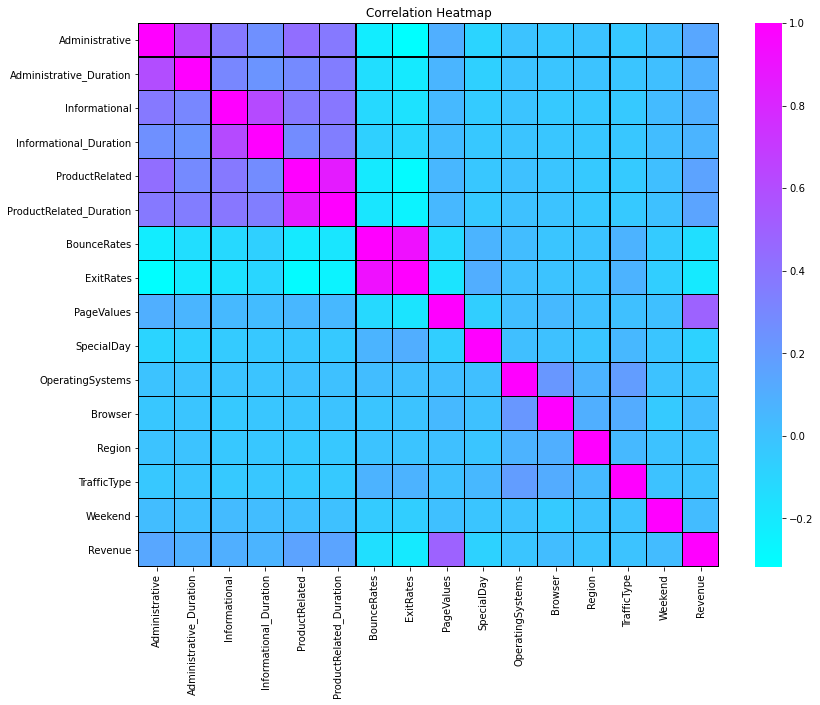

In [53]:
#correlation heat map(lower triangle only)
sns.heatmap(df.corr(),cmap='cool',linewidths=0.2, linecolor='black')#setting the format of the heatmat
plt.rcParams['figure.figsize'] = [13, 10]#set figure size
plt.title('Correlation Heatmap')#title
plt.show()#display

### 5.2 Break the illusion of customers being loyal with percentage normalization


* a better visuliazation to study: https://matplotlib.org/stable/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py

In [24]:
#count the number revenues made for each visitor type
pd.crosstab(df.Revenue,df.VisitorType)

VisitorType,New_Visitor,Other,Returning_Visitor
Revenue,,,
False,1272,69,9081
True,422,16,1470


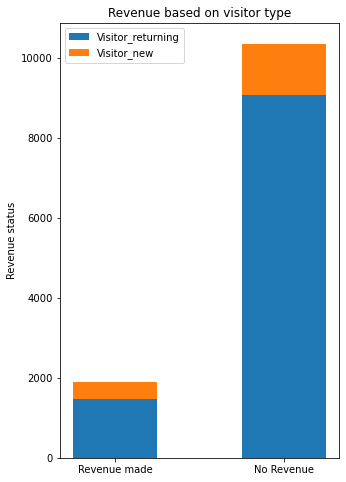

In [72]:
#visualize revenues for returning and new visitors
N = 2 # there will be 2 columns, 1 for revenue, 1 for no revenue
# visitor type = (revenue=1, revenue=0) 
Visitor_new = (422,1272)
Visitor_returning = (1470,9081)  
ind = np.arange(N)  
width = 0.5 
 
fig = plt.subplots(figsize =(5, 8))#set figure size 
p1 = plt.bar(ind, Visitor_returning, width)
p2 = plt.bar(ind, Visitor_new, width,
             bottom = Visitor_returning)

plt.ylabel('Revenue status')
plt.title('Revenue based on visitor type')
plt.xticks(ind, ('Revenue made', 'No Revenue'))
plt.legend((p1[0], p2[0]), ('Visitor_returning', 'Visitor_new'))
plt.show()

In [27]:
#count the number revenues made for each visitor type
pd.crosstab(df.Revenue,df.VisitorType,normalize="columns")

VisitorType,New_Visitor,Other,Returning_Visitor
Revenue,,,
False,0.750885,0.811765,0.860677
True,0.249115,0.188235,0.139323


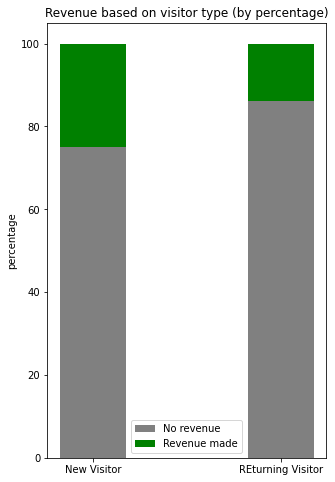

In [83]:
#visualize revenues for returning and new visitors
N = 2 # there will be 2 columns, 1 for revenue, 1 for no revenue
# visitor type = (revenue=1, revenue=0) 
revenue_made = (0.249115*100,0.139323*100 )
no_revenue = (0.750885*100,0.860677*100)  
ind = np.arange(N)  
width = 0.35 
 
fig = plt.subplots(figsize =(5, 8))#set figure size 
p1 = plt.bar(ind, no_revenue, width,color = 'grey')
p2 = plt.bar(ind, revenue_made, width,color='green',
             bottom = no_revenue)

plt.ylabel('percentage')
plt.title('Revenue based on visitor type (by percentage)')
plt.xticks(ind, ('New Visitor', 'REturning Visitor'))
plt.legend((p1[0], p2[0]), ( 'No revenue','Revenue made'))
plt.show()

In [19]:
sum(df[df.VisitorType == 'New_Visitor'].Revenue)

422

In [ ]:
sum(df[df.VisitorType == 'New_Visitor'].Revenue)

In [13]:
df.Revenue==True

0        False
1        False
2        False
3        False
4        False
         ...  
12325    False
12326    False
12327    False
12328    False
12329    False
Name: Revenue, Length: 12330, dtype: bool

# K-means clustering (2 features):

In [ ]:
# features in this model are the 5th and 6th attributes: 'ProductRelated_Duration' and 'BounceRates'
x = df.iloc[:, [5, 6]].values 

In [ ]:
#Find optimum number of cluster using the Elbow methods
sse = [] #SUM OF SQUARED ERROR
#compare the SSE from 1 cluser up to 10 clusters
for k in range(1,11): #iterate from 1 to 10
    km = KMeans(n_clusters=k, random_state=2)#initialize the model of k clusters, seed the randomness with '2'
    km.fit(x)#fit the model of k clusters
    sse.append(km.inertia_)#append the sse to the list 'sse'
    
sns.set_style("whitegrid")#set grid background of the plot
g=sns.lineplot(x=range(1,11), y=sse)#set x-axis and y-axis

#set texts in the plot
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Sum Squared Error", 
      title ='Elbow Method using SSE')
plt.xticks(range(1,11,1))  
plt.show()#show the plot

We observe from the above plot that 2 clusters will be ideal. 

In [ ]:
# fitting the K-means clustering model with 2 clusters: Uniterested Customers & Target Customers
# and 2 features: Product Relate Duration vs Bounce Rates
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_means = km.fit_predict(x)

plt.scatter(x[y_means==0,0],x[y_means==0,1],s=50,c='aquamarine',label='Uniterested Customers')
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=50,c='pink',label='Target Customers')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='darkgreen',label='centroid')

plt.title('K-Means Clustering w/ 2 features & 2 clusters', fontsize=20)
plt.grid()
plt.xlabel('Product Realted Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

# Reference
Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018)\
https://www.kaggle.com/datasets/henrysue/online-shoppers-intention?datasetId=477512&sortBy=voteCount \
https://www.geeksforgeeks.org/machine-learning/?ref=lbp